# Clean run of motifs

- Take boundry conditions into account as well


In [1]:
import bluepy
import netsci.visualization as nsv
import numpy as np
import scipy
import netsci.metrics.motifs as nsm
import networkx
import matplotlib.pyplot as plt
import netsci.models.random as nsr
import glob, os
from pathlib import Path
import pandas as pd
import seaborn as sns

In [2]:
circ=bluepy.Circuit('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/CircuitConfig')

In [8]:
cylinders = [i for i in circ.cells.targets if i.startswith('cylinder') ]
cylinders.remove('cylinders')
cylinders.remove('cylinders300')
cylinders.remove('cylinder300_inh')
cylinders.remove('cylinder300_exc')
cylinders

['cylinder216679r300',
 'cylinder253803r300',
 'cylinder329179r300',
 'cylinder128660r300',
 'cylinder299049r300',
 'cylinder300',
 'cylinder397485r300',
 'cylinder269358r300',
 'cylinder109262r300',
 'cylinder297714r300']

In [5]:
data_dict = {}
cur_path = os.getcwd()
for i in os.listdir('cylinders_analysis/'):
    if i != 'mosaic':
        print(i)
        cur_conn_path = os.path.join(cur_path,'cylinders_analysis',i,'data/connectivity.npz')
        data_dict[i] = np.array(1*scipy.sparse.load_npz(cur_conn_path).todense())

cylinder253803r300
cylinder128660r300
cylinder109262r300
cylinder216679r300
cylinder269358r300
cylinder329179r300
cylinder299049r300
cylinder397485r300
cylinder300
cylinder297714r300


In [18]:
for key in data_dict.keys():
    print(key,data_dict[key].shape[0],'cells', len(np.where(data_dict[key] ==1)[0]),' connections')

cylinder253803r300 6532 cells 1337273  connections
cylinder128660r300 5461 cells 1094236  connections
cylinder109262r300 7302 cells 1684298  connections
cylinder216679r300 7716 cells 2145066  connections
cylinder269358r300 6360 cells 1279000  connections
cylinder329179r300 7934 cells 2058463  connections
cylinder299049r300 7733 cells 1890808  connections
cylinder397485r300 7293 cells 1831328  connections
cylinder300 6213 cells 1236142  connections
cylinder297714r300 6397 cells 1279554  connections


In [26]:
os.path.exists('/gpfs/bbp.cscs.ch/project/proj112/home/kurban/topo_analysis/ca1-usecase/output_data/cylinder_motifs.csv')

True

In [27]:
if not os.path.exists('/gpfs/bbp.cscs.ch/project/proj112/home/kurban/topo_analysis/ca1-usecase/output_data/cylinder_motifs.csv'):
    # takes some time
    motifs_dict = {}
    for key,value in data_dict.items():
        cur_motifs =  nsm.motifs(value, algorithm='louzoun',participation=True)
        motifs_dict[key] = cur_motifs
        print(key, cur_motifs[0],sep=': ')
    df = pd.DataFrame(motifs_dict).T
else:
    print('Analysis is done already')

Analysis is done already


In [22]:
df = pd.read_csv('output_data/cylinder_motifs.csv',index_col=0).T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
cylinder253803r300,-1,-1,-1,178734851,99525261,295441654,28182635,67881009,22492307,2605358,4356238,3720892,6337554,1865368,1971033,254306
cylinder128660r300,-1,-1,-1,142487344,88036575,197200061,21620821,50392340,20395426,2101345,3833357,3121825,4658357,1614183,1642341,205584
cylinder109262r300,-1,-1,-1,253127189,135220160,372205140,42703472,85314472,28438655,3012173,5514923,5034203,8435787,2666085,2645271,319716
cylinder216679r300,-1,-1,-1,394273166,224272293,489437529,62357294,116354430,46267547,4603009,8242205,7399145,11515878,4129137,3882572,463493
cylinder269358r300,-1,-1,-1,167341604,91404836,274651330,27758150,60543269,20513856,2290958,3963979,3465058,5750610,1825413,1759504,214859
cylinder329179r300,-1,-1,-1,354487798,194955305,448651532,57011264,105494498,38869962,3758723,7203242,6525832,10514357,3515083,3455968,421153
cylinder299049r300,-1,-1,-1,288746366,161817464,493848463,51079900,107533606,33450093,3889696,6522452,6190598,10461618,3317235,3274530,424817
cylinder397485r300,-1,-1,-1,309895393,168698759,384096498,48340938,93939392,35881945,3752144,6800374,6121797,9198090,3168135,3145564,377087
cylinder300,-1,-1,-1,162025739,90327698,248200864,26151493,58563579,19939329,2211349,3976892,3382804,5457691,1721108,1735092,206611
cylinder297714r300,-1,-1,-1,168271636,92580400,291512770,27001356,70569521,23884861,2598737,4838829,3875263,6543081,1901566,2102350,261275


In [31]:
log_motifs = df.copy()
log_motifs = log_motifs.iloc[:,3:]
log_motifs = np.log10(log_motifs)
log_motifs.columns = np.arange(1,14)
log_motifs

,1,2,3,4,5,6,7,8,9,10,11,12,13
cylinder253803r300,8.252209,7.997933,8.470472,7.449982,7.831748,7.352034,6.415867,6.639112,6.570647,6.801922,6.270765,6.294694,5.405357
cylinder128660r300,8.153776,7.944663,8.294907,7.334872,7.702365,7.309533,6.322497,6.583579,6.494409,6.668233,6.207953,6.215463,5.312989
cylinder109262r300,8.403339,8.131041,8.570782,7.630463,7.931023,7.453909,6.478880,6.741539,6.701931,6.926126,6.425874,6.422470,5.504764
cylinder216679r300,8.595797,8.350776,8.689697,7.794887,8.065783,7.665276,6.663042,6.916043,6.869182,7.061297,6.615859,6.589120,5.666043
cylinder269358r300,8.223604,7.960969,8.438782,7.443391,7.782066,7.312047,6.360017,6.598131,6.539711,6.759714,6.261361,6.245390,5.332154
cylinder329179r300,8.549601,8.289935,8.651909,7.755961,8.023230,7.589614,6.575040,6.857528,6.814636,7.021783,6.545936,6.538570,5.624440
cylinder299049r300,8.460517,8.209025,8.693594,7.708250,8.031544,7.524397,6.589916,6.814411,6.791733,7.019599,6.520776,6.515149,5.628202
cylinder397485r300,8.491215,8.227112,8.584440,7.684315,7.972848,7.554876,6.574279,6.832533,6.786879,6.963698,6.500804,6.497699,5.576442
cylinder300,8.209584,7.955821,8.394803,7.417496,7.767628,7.299711,6.344657,6.599544,6.529277,6.737009,6.235808,6.239323,5.315153
cylinder297714r300,8.226011,7.966519,8.464658,7.431386,7.848617,7.378123,6.414762,6.684740,6.588301,6.815782,6.279111,6.322705,5.417098


In [32]:
df3 = df.copy()
df3 = df3.iloc[:,3:]
df3 = np.divide(df3,1e8)
df3.columns = np.arange(1,14)
df3

,1,2,3,4,5,6,7,8,9,10,11,12,13
cylinder253803r300,1.787349,0.995253,2.954417,0.281826,0.678810,0.224923,0.026054,0.043562,0.037209,0.063376,0.018654,0.019710,0.002543
cylinder128660r300,1.424873,0.880366,1.972001,0.216208,0.503923,0.203954,0.021013,0.038334,0.031218,0.046584,0.016142,0.016423,0.002056
cylinder109262r300,2.531272,1.352202,3.722051,0.427035,0.853145,0.284387,0.030122,0.055149,0.050342,0.084358,0.026661,0.026453,0.003197
cylinder216679r300,3.942732,2.242723,4.894375,0.623573,1.163544,0.462675,0.046030,0.082422,0.073991,0.115159,0.041291,0.038826,0.004635
cylinder269358r300,1.673416,0.914048,2.746513,0.277581,0.605433,0.205139,0.022910,0.039640,0.034651,0.057506,0.018254,0.017595,0.002149
cylinder329179r300,3.544878,1.949553,4.486515,0.570113,1.054945,0.388700,0.037587,0.072032,0.065258,0.105144,0.035151,0.034560,0.004212
cylinder299049r300,2.887464,1.618175,4.938485,0.510799,1.075336,0.334501,0.038897,0.065225,0.061906,0.104616,0.033172,0.032745,0.004248
cylinder397485r300,3.098954,1.686988,3.840965,0.483409,0.939394,0.358819,0.037521,0.068004,0.061218,0.091981,0.031681,0.031456,0.003771
cylinder300,1.620257,0.903277,2.482009,0.261515,0.585636,0.199393,0.022113,0.039769,0.033828,0.054577,0.017211,0.017351,0.002066
cylinder297714r300,1.682716,0.925804,2.915128,0.270014,0.705695,0.238849,0.025987,0.048388,0.038753,0.065431,0.019016,0.021024,0.002613


Text(0, 0.5, 'occurences')

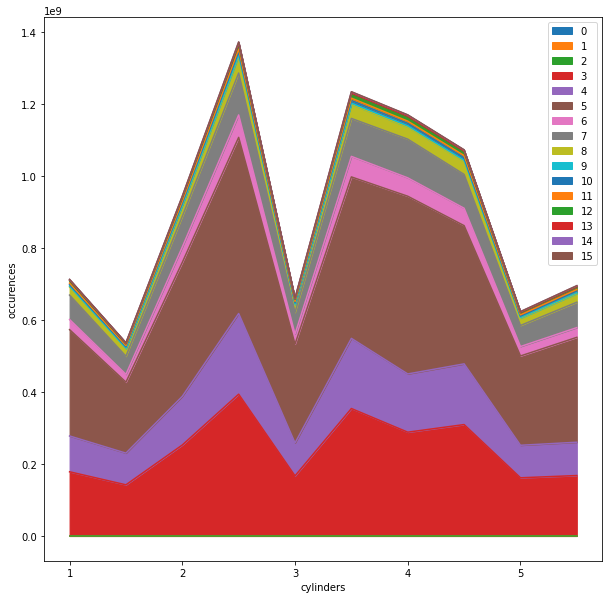

In [34]:
ax = df.plot.area(figsize=(10,10))
ax.set_xticklabels(np.arange(7))
plt.xlabel('cylinders')
plt.ylabel('occurences')

Text(0.5, 1.0, 'Motifs distribution in cylinders (n=10)')

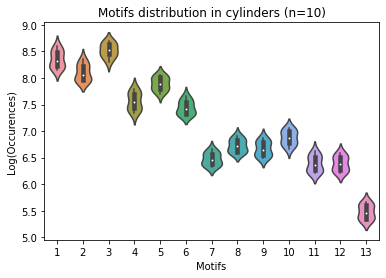

In [37]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot(data=log_motifs, ax = axes)
plt.xlabel('Motifs')
plt.ylabel('Log(Occurences)')
plt.title('Motifs distribution in cylinders (n=10)')

Text(0.5, 1.0, 'Motifs distribution in cylinders (n=10)')

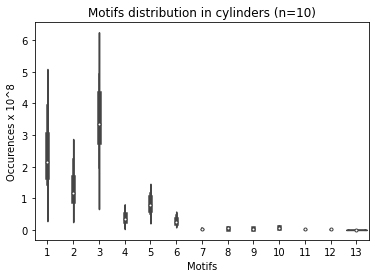

In [38]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot(data=df3, ax = axes)
plt.xlabel('Motifs')
plt.ylabel('Occurences x 10^8')
plt.title('Motifs distribution in cylinders (n=10)')

# Random Graph (average of 10 cylinders)

In [42]:
cylinder300_n = 6213 # num of cells in cylinder300
cylinder300_p = 0.032 # 0.015ti onceden

In [40]:
sparsities = []
num_nodes = []
num_edges = []
for cylinder,value in data_dict.items():
    num_edges.append(len(np.where(data_dict[cylinder]!=0)[0]))
    num_nodes.append(data_dict[cylinder].shape[0])
    sparsities.append(len(np.where(data_dict[cylinder]!=0)[0]) / data_dict[cylinder].size) # divide nonzeros in adj matrix to its size to get its sparsity

In [41]:
n = int(np.mean(num_nodes))
p = np.mean(sparsities)
print(n,p)

6894 0.03293146288255226


In [43]:
erdos_mean = nsr.erdos_renyi(n, p)
erdos_motifs_mean = nsm.motifs(erdos_mean, algorithm='louzoun')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<AxesSubplot:title={'center':'Random Graph with n=6894, p=0.033'}>,
 <AxesSubplot:>]

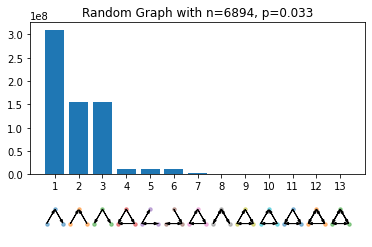

In [44]:
nsv.bar_motifs(erdos_motifs_mean,title=f'Random Graph with n={n}, p={np.round(p,3)}')

# For cylinder300

In [ ]:
n = 6213 # num of cells in cylinder300
#p = 0.015 # based on PCs only
p = len(np.where(data_dict['cylinder300'] == 1)[0]) / n**2
erdos = nsr.erdos_renyi(n, p)

In [ ]:
erdos_motifs = nsm.motifs(erdos, algorithm='louzoun')

In [ ]:
nsv.bar_motifs(erdos_motifs,title=f'ER Graph (cylinder300) with n={n}, p={np.round(p,3)}')

In [ ]:
ax0, ax1 = nsv.bar_motifs(erdos_motifs,title=f'Random Graph with n={n}, p={np.round(p,3)}')
ax0.set_ylim([0,4e8])

# Dense ER

In [ ]:
erdos_dense = nsr.erdos_renyi(n, 0.1)
erdos_motifs_dense = nsm.motifs(erdos_dense, algorithm='louzoun')

In [ ]:
nsv.bar_motifs(erdos_motifs_dense,title='Random Graph p=0.1')

# Z score

In [ ]:
data_dict['cylinder300'].shape[0]

First, we need to calculate motifs for ER and dd networks 1000 times. then use their mean and std of motif structures to normalize our motifs

In [ ]:
num_repetitions = 1000
motifs = []
n = data_dict['cylinder300'].shape[0] # num of cells in cylinder300 = 6213
p = len(np.where(data_dict['cylinder300'] == 1)[0]) / n**2 # p = 0.032
for rep in range(num_repetitions):
    cur_erdos = nsr.erdos_renyi(n, p)
    cur_motifs = nsm.motifs(cur_erdos, algorithm='louzoun')
    motifs.append(cur_motifs)
np.save('ER_motifs',motifs)

In [ ]:
df2 = pd.read_csv('motifs_exp_control.csv',index_col=0)
df2

In [ ]:
dd_motifs = np.array([206002585, 103002838, 103030367,   8864003,  12187251,  12178900,
         2955388,    358112,    601756,    301333,    300414,     44187,
             590])

In [ ]:
all_motifs_dd = np.load('10_motifs_dd.npy')
dd_mean = np.mean(all_motifs_dd,axis=0)[3:]
dd_std = np.std(all_motifs_dd,axis=0)[3:]

In [ ]:
z_dd = (df2.loc['cylinder300'][3:].values - dd_mean) / dd_std

In [ ]:
nsv.bar_motifs(np.hstack([-np.ones(3),z_dd]),title='Z-score based on DD-graph')

In [ ]:
from matplotlib import pyplot as plt, gridspec
from netsci.metrics.motifs import *

In [ ]:
from netsci.visualization.motifs import *

In [ ]:
order = range(len(z_dd))
x = 1 + np.arange(len(order))
plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3])
ax0 = plt.subplot(gs[0])
ax0.bar(x, z_dd[order])
_=plt.xticks(x)

ax1 = plt.subplot(gs[1], sharex=ax0)
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')

In [ ]:
nsv.bar_motifs(np.hstack([-np.ones(3),dd_mean]),title='Triplets in Distance Dependent Graph (n=10)')

In [ ]:
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3])
ax0 = plt.subplot(gs[0])
plt.plot(x,z_dd,'k')
_=plt.xticks(x)
plt.legend(['dd'],loc='best')
plt.ylabel('z-score')

# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')



In [ ]:
motifs_ER = []
for i in range(100,1100,100):
    cur_file = np.load(f'ER_motifs_{i}.npy')
    motifs_ER.extend(cur_file)
motifs_ER = np.array(motifs_ER)

In [ ]:
mean_motifs_ER = np.mean(motifs_ER,axis=0)
std_motifs_ER = np.std(motifs_ER,axis=0)

In [ ]:
nsv.bar_motifs(mean_motifs_ER,title='ER Graph, n=6213, p=0.032 (N=1000)')

In [ ]:
z_ER = (df2.loc['cylinder300'][3:].values - mean_motifs_ER[3:]) / std_motifs_ER[3:]

In [ ]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3],figure=fig)
ax0 = plt.subplot(gs[0])
plt.plot(x,z_dd,'k')
plt.plot(x,z_ER,'gray')

_=plt.xticks(x)
plt.legend(['dd','ER'],loc='best')
plt.ylabel('z-score')

# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')
plt.savefig('CA1_ER_dd_triads_zscore.png')



# Reciprocal ER

In [ ]:
reciprocal_conns_list = []
for i in range(data_dict['cylinder300'].shape[0]):
    for j in range(data_dict['cylinder300'].shape[1]):
        if i != j:
            if data_dict['cylinder300'][i,j] == data_dict['cylinder300'][j,i]:
                if data_dict['cylinder300'][i,j] != 0:
                    reciprocal_conns_list.append([i,j])

In [ ]:
len(reciprocal_conns_list)

In [ ]:
data = {tuple(sorted(item)) for item in reciprocal_conns_list}

In [ ]:
len(data)

In [ ]:
p_reciprocal = len(reciprocal_conns_list) / data_dict['cylinder300'].shape[0]**2
p_reciprocal

In [ ]:
n = 6213 # num of cells in cylinder300
p = len(np.where(data_dict['cylinder300'] == 1)[0]) / n**2
p_reciprocal = len(reciprocal_conns_list) / data_dict['cylinder300'].shape[0]**2

ER_reciprocal = nsr.erdos_renyi_reciprocal(n, p,p_reciprocal)

In [ ]:
print(n,p,p_reciprocal)

In [ ]:
ER_reciprocal_motifs = nsm.motifs(ER_reciprocal, algorithm='louzoun')

In [ ]:
nsv.bar_motifs(ER_reciprocal_motifs,title=f'ER Reciprocal n:{n}, p={np.round(p,3)}, r={np.round(p_reciprocal,3)}')

In [ ]:
reciprocal_ER_motifs = np.load('ER_motifs_reciprocal.npy')

In [ ]:
mean_motifs_ER_recip = np.mean(reciprocal_ER_motifs,axis=0)
std_motifs_ER_recip = np.std(reciprocal_ER_motifs,axis=0)
nsv.bar_motifs(mean_motifs_ER_recip,title='ER Graph, n=6213, p=0.032 (N=1000)')

In [ ]:
z_ER_reciprocal = (df2.loc['cylinder300'][3:].values - mean_motifs_ER_recip[3:]) / std_motifs_ER_recip[3:]

In [ ]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3],figure=fig)
ax0 = plt.subplot(gs[0])
plt.plot(x,z_dd,'k')
plt.plot(x,z_ER,'gray')
plt.plot(x,z_ER_reciprocal,'silver')


_=plt.xticks(x)
plt.legend(['dd','ER','ER_reciprocal'],loc='best')
plt.ylabel('z-score')
plt.title('Comparison of CA1 triad motifs with different random models (cylinder300)')
# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))

ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')
plt.savefig('CA1_ER_dd_triads_zscore.png')



In [ ]:
def normalize(z):
    return z/np.sqrt(np.sum(np.square(z)))

In [ ]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[10, 3],figure=fig)
ax0 = plt.subplot(gs[0])
plt.plot(x,normalize(z_dd),'k')
plt.plot(x,normalize(z_ER),'gray')
plt.plot(x,normalize(z_ER_reciprocal),'silver')


_=plt.xticks(x)
plt.legend(['dd','ER','ER_reciprocal'],loc='best')
plt.ylabel('Normalized z-score')
plt.title('(Normalized) Comparison of CA1 triad motifs with different random models (cylinder300)')
# after plotting the data, format the labels
#current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
#plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax1 = plt.subplot(gs[1], sharex=ax0)
_=plt.xticks(np.arange(1,14))
plot_all_triads(range(3,16), ax=ax1, label=False)
plt.axis('off')
plt.savefig('CA1_ER_dd_triads_zscore_norm.png')

